# "Spin Glass Models 2: Sherrington-Kirkpatrick"
> "Following on from the previous blog post introducing spin-glass models we now look at an example model from Sherrington-Kirkpatrick dating back to 1975. We outline some mathematical tools for analysing the model use Python to simulate and explore its behaviour."
- toc: true
- author: Lewis Cole (2020)
- branch: master
- badges: false
- comments: false
- categories: [Spin-Glass, Magnet, Sherrington-Kirkpatrick]
- hide: false
- search_exclude: false
- image: https://github.com/lewiscoleblog/blog/raw/master/images/spin-glass/fully-connected.png

___
This is the second blog post in a series - you can find the previous blog post [here](https://lewiscoleblog.com/spin-glass-models)
___

From a previous blog post we now have a reasonable understanding of what a spin glass is, some of the (frankly) bizarre behaviours they exhibit and some motivation behind why we might want to wish to study them. In this blog post we will embark on studying our first spin glass model due to Sherrington-Kirkpatrick. (Note: this model is sometimes also called the fully-connected Ising model.)

For our purposes we will just consider finding the properties and behaviours of interest rather than trying to capture exact behaviour of specific materials. As such we will assume measurement units are such that any constants "disappear" this should help with clarity. It is worth keeping this in mind if you look at any research on the topic (particularly in Physics journals) where extra terms may appear, these are typically to correct for units (e.g. to get energy measurements in Joules, distances in metres, etc.)

It is also worth noting that this model was not the first spin glass model and some other models appeared before this one. I have chosen to start with this as it is in some ways the "simplest" model.

## Simplification
As with any good model we want to simplify the real world to a set of minimal requirements to capture the behaviour of interest. Recall the Hamiltonian for a general spin glass as:
$$ H = - \sum_{x,y} J_{xy} \sigma_x \sigma_y  - h \sum_x \sigma_x $$
In a real world spin glass $\sigma$ represent spins in the form of vectors denoting the direction the magnetic moment faces. It turns out that allowing for all range of orientation of spins is unnecessary to observe interesting behaviour. For modelling purposes $\sigma_x = \pm 1$ is usually sufficient.

Turning our attention to interacting pairs now, we can simplify significantly here by assuming a fully connected model. That is each atom interacts with every other. This is particularly useful since it allows us to use a range of mathematical "tricks" through mean field type approaches. This is the key to the Sherrington-Kirkpatrick model and what differentiates it from other models (which we will review in a later blog post).
![](https://github.com/lewiscoleblog/blog/raw/master/images/spin-glass/fully-connected.png "Source: https://en.wikipedia.org/wiki/Complete_graph")

This leaves us with one final assumption to make (excluding the external magnetic field): what values should $J_{xy}$ take. There are two options that we could use here to make our lives easier: the first is $J_{xy} = \pm \frac{J}{\sqrt{N}}$ - that is we select each interaction to be positive (ferromagnetic) or negative (antiferromagnetic) at random. Another option is to take values via a continuous probability distribution, typically a normal distribution owing to its "nice" mathematical properties. Typically we will want a mean of zero since we do not want the material to exhibit any magnetism in a ground state. We want to scale the standard deviation by $\frac{1}{\sqrt{N}}$ as in the bernoulli case. If we are using simulation we could try more "exotic" distributions (such as double fat-tail, assymetric distributions, etc) The scalings applied to the interaction weights is merely a convenience to allow us to scale the size of the spin glass in such a way as to allow population averages to remain comparable between glass size.

We will thus define the Sherrington-Kirkpatrick Hamiltonian as:
$$ H_N = - \sum_{x,y} J_{xy} \sigma_x \sigma_y $$
With $J_{xy} \sim N(0,\frac{s^2}{N})$ iid (value of $s$ is somewhat irrelevant as long as it's not too large/small). We have removed the external magnetic field as it isn't crucial for the story we are telling here.

## An Alternate Interpretation
For those that are finding spin glasses and magnet terminology a little confusing or alien for this particular model we can introduce another interpretation in the form of the "Dean Problem". Imagine you are the dean of a college hall, you have a number of students ($x, y$) who can like or dislike each other ($J_{xy}$). Your job is to place students in one of two groups ($\sigma = \pm 1$) so as to maximise the overall happiness of the students ($\sum J_{xy} \sigma_x \sigma_y$). We can note that this maximization problem is equivalent to the energy minimization problem presented by the spin glass (i.e. the minimization of a negative quantity is equivalent to the maximization of its modulus)

## Mathematical Analysis
The nice thing about the assumptions made by Sherrington-Kirkpatrick is that it allows for (comparatively) easy mathematical analysis. This is largely due its regularity (every atom looks like every other), by assuming arbitrarily large spin glasses we can also take limits and look at asymptotic behaviour. In other models this is not always possible and if it is it becomes increasingly more difficult.

First question we will ask is what is the minimum value attained by the Hamiltonian? This is equivalent to:
$$M_N = max_{\sigma} \sum J_{xy} \sigma_x \sigma_y = max_{\sigma} \left[ - H_N \right]  $$
Where we are considering $N$ atoms in the system. We are using a slighlty sloppy notation for $max_{\sigma}$ to represent the maximum over all possible configurations.

Studying maximum quantities mathematically is often difficult. To overcome this difficulty we instead look at the Helmholtz free energy function ($F_N$) instead:
$$F_N(\beta) = \frac{1}{N\beta} \mathbb{E}\left[ log \sum_{\sigma} exp(- \beta H_N) \right] $$

We have done this since we can write the following inequality:
$$ \frac{1}{N} \mathbb{E} \left[ M_N \right] \leq F_N(\beta) \leq  \frac{1}{N} \mathbb{E} \left[ M_N \right] + \frac{log(2)}{\beta} $$

This is a deceptively simple inequality, to see why it holds for the lower bound we replace the summation in $F_N$ by the maximum value in the sum (1 term). For the upper bound we replace every term in the sum with this attained maximum ($2^N$ values). The logs/exponents/beta/etc. all cancel leaving the result. This is useful to us because it means in the limit $\beta \to \infty$ we get the relation: $F_N(\beta) \to  \frac{1}{N} \mathbb{E} \left[ M_N \right] $ which is what we are interested in studying.

This is closely related to the Gibbs distribution of the system. This gives  us a probability distribution of states of the spin glass:
$$G_N(\sigma) = \frac{exp(-\beta H_N(\sigma))}{Z_N(\beta)} $$
Where $Z_N(\beta)$ is the partition function, it is a normalizing constant (i.e. it is a sum over all possible terms of the numerator of $G_N$). We can think of the Gibbs distribution as weighting the configurations according to their free energy. We can see that finding the partition function is the crux of understanding the Gibbs distribution (and through comparison to the free energy the ground states).

One of the first ways this was investigated mathematically was to use a "replica trick", this is just a result of using the identity:
$$ln(Z) = lim_{n \to 0} \frac{Z^n - 1}{n} $$

On the partition function. Essentially one takes $n$ independent copies (replicas) of the system and computes an average over all of them. Approximations are then used to take the limit $n$ to zero. For certain system behaviours this method works well but for others it can be inaccurate. In particular looking at very low temperatures (small beta near ground state) the approximations do not perform well. This method assumes certain symmetries between atoms which are not true in practice (due to taking independent replicas and averaging), these methods have been extended to "replica symmetry breaking" (RSB) methods. These methods were further superceded by the work of Parisi using variational principles. The mathematical details would take too long to put in a blog like this. Please see the references for links to papers on the topic.

What we are really interested in with spin glass systems is when a phase transition occurs. To do this physicists look at an order parameter which captures all behaviours of the system. Edwards and Anderson suggested the following order parameter:
$$ q = \frac{1}{N} \sum_x  \hat{\sigma}_x^2 $$
Where $\hat{\sigma}_x$ represents the average over time of spin $x$. This order parameter is such that for $q=0$ the configuration is non-magnetic. For $q>0$ then it is in a spin glass phase. Using the replica method (and some work!) we can show that under full symmetry we have that $q$ satisfying the self-consistency formula:
$$ q = 1 - \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} exp(-z^2/2) sech^2(\beta s \sqrt{q} z) dz $$
Using this we can find a phase transition occurs at $T=s$ - temperatures below this the system exhibits glassy behaviour and above this the system is not magnetic (in equilibrium).

Unfortunately assuming this sort of symmetry this $q$ does not behave well at lower temperatures, it does not display all the characteristics of the system.

If we introduce symmetry breaking we re-write the order parameter of the form:
$$ q_{\alpha \beta} = \frac{1}{N} \sum_x  \hat{\sigma}^{\alpha}_x \hat{\sigma}^{\beta}_x$$
For two states $\alpha$ and $\beta$ - This is also sometimes called the "spin overlap function". If we consider the likelihood of observing a system state $\alpha$ as $W_{\alpha}$ (so that $\sum_{\alpha} W_{\alpha} = 1$) we can define the overlap density:
$$P_\tilde{J}(q) = \sum_{\alpha \beta} W_{\alpha}W_\beta \delta(q - q_{\alpha \beta})$$
Where $\delta(.)$ is the Dirac delta function and the density is defined for some fixed realisation of interaction strengths $\tilde{J}$. Finally we can use this to define the Parisi order parameter function as:
$$P(q) = \int \prod_{xy} Q(J_{xy}) P_\tilde{J}(q) dJ_{xy}$$
With $Q(J_{xy})$ representing the density by which the interaction strength is chosen (e.g. Gaussian). This order parameter does not suffer from the issues of symmetry like the order parameter function above.

In addition to uncovering a phase transition, the new Parisi order parameter uncovers some other interesting properties:
* The broken symmetry of the spin glass requires an infinite number of order parameters to characterize
* In the limit of large-N there is no self-averaging in the spin glass state. That is there exists distinct samples even as N approaches infinity. This is unlike most other systems where there is no concept of a "sample" when N increases.
* Given 2 states of the spin glass, there is no "inbetween" spin glass state - this is called [ultrametric structure](https://en.wikipedia.org/wiki/Ultrametric_space). This gives the space of spin glass states a very interesting structure. In some sense the states are clustered. More than that it is clustered at any scale you look at - if you look at states within a distance of $d$ of each other you get a number of clusters, if you look at a larger scale $d' > d$ then these small clusters will merge into larger ones. (Distance here is defined using overlap of states).

## Simulation
After all the text we will now look at a simple simulation of this model. For now we will do this in a naïve way. In practice you wouldn't want to use this method, it will be very very inefficient and will be highly likely to get stuck in local minima and will struggle to find a global minima from all starting points (particularly at lower temperatures). In a future post we will look at some better methods for simulation that will improve performance.

Given a configuration of spins we will perform an update step by picking a site at random, we will compute the probability of flipping the spin and then accept/reject this change based on a random draw. This process will be repeated for a set number of steps - we could enforce a stopping criteria (e.g. stop if the energy remains constant for some number of updates) however given the inefficiency of this method we will not bother. We will keep track of the energy of the system (the Hamiltonian) and the overall magnetism ($\sum_x \sigma_x$).

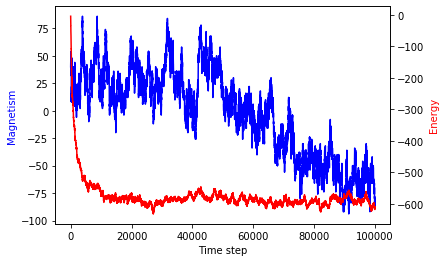

In [1]:
# An implementation of a Sherrington-Kirkpatrick spin-glass of size N
# Connectivity is initialized as a Gaussian distribution N(0, s^2/N)
# Updates occur at randomly selected sites

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fix random seed
np.random.seed(123)

# Set size of model N and initial spins
N = 1000
spins = np.random.choice([-1, 1], N)

# Fix number of timesteps and some containers
timesteps = 100000
mag = np.zeros(timesteps+1)
energy = np.zeros(timesteps+1)

# Initialize interaction array
s = 1
interaction = np.zeros((N, N))
for i in range(N):
    for j in range(i):
        interaction[i, j] = np.random.randn() * s / np.sqrt(N)
        interaction[j, i] = interaction[i, j]

# Calculate initial values
mag[0] = spins.sum()
energy[0] = -1 * np.dot(spins, np.dot(spins, interaction)) / 2

# Fix beta (inverse temerature) - from analysis we know that
# system in glassy-phase for T<s so beta>1/s. Performance
# of random updates isn't good so don't select temperature
# too low
beta = 1/(0.75*s)

# Define update step
dE = 0
dM = 0

def update(s_array, i_array):
    """
    update function performs 1 update step to the model
    
    inputs:
    s_array - an array of N spins (+-1)
    i_array - an array of interaction strengths NxN
    """
    global dE
    global dM
    
    _N = s_array.shape[0]
    old_s = s_array.copy()
    
    # Select a spin to update
    site = np.random.choice(_N, 1)[0]
    
    # Get interaction vector
    i_vector = i_array[site,:]
    
    # Calculate energy change associated with flipping site spin
    dE = 2*np.dot(i_vector, s_array)*s_array[site]
    dM = s_array[site]*-1 - s_array[site]
    
    # Calculate gibbs probability of flip
    prob = np.exp(-beta*dE)
    
    # Sample random number and update site
    if dE <= 0 or prob > np.random.random():
        s_array[site] *= -1
    else:
        dE = 0
        dM = 0   
    
    return s_array

def _main_loop(ts , s_array, i_array):
    s_temp = s_array.copy()
    for i in range(ts):
        update_step = update(s_temp, i_array)
        s_temp = update_step
        energy[i+1] = energy[i] + dE
        mag[i+1] = mag[i] + dM

#### Run Main Loop
_main_loop(timesteps, spins, interaction)

# plot magnetism and energy evolving in time
fig, ax1 = plt.subplots()
ax1.set_xlabel("Time step")
ax1.set_ylabel("Magnetism", color='blue')
ax1.plot(mag, color='blue')

ax2 = ax1.twinx()
ax2.set_ylabel("Energy", color='red')
ax2.plot(energy, color='red')

plt.show()

In this code we can see in the beginning the magnetism of the system fluctating and the energy decreasing. This stablises to some sort of "quasi-equilibrium" but even after 100k time steps the system has still not converged to an energy minima.

Eventually the magnetism is fixed as the system has found an energy minimum. Since the energy always decreases it suggests the system is slowly finding its way to a local energy minimum rather than exploring to find a better energy minima. This is to be expected with such a basic implementation. To observe this better we will re-run the code for a second time from a different starting spot, we will compare the resulting spin array - we should notice that there is quite a large discrepency between the 2 runs - this shows that the system is settling down to a different local energy minima.

In [2]:
old_spins = spins
old_energy = energy[timesteps]
old_mag = mag[timesteps]

spins = np.random.choice([-1, 1], N)

#### Run Main Loop
_main_loop(timesteps, spins, interaction)

# Calculate a distance metric
dist = ((old_spins * spins).sum() / N + 1) / 2

print("Proportion of sites with the same spin is:", dist)
print("Resting energies of the 2 systems are:", old_energy, "and:", energy[timesteps])
print("Resting magnetism of the 2 systems are:", old_mag, "and:",  mag[timesteps])

Proportion of sites with the same spin is: 0.508
Resting energies of the 2 systems are: -608.7546315240614 and: -589.7510068842638
Resting magnetism of the 2 systems are: -84.0 and: 56.0


The proportion of sites having the same spin is high (around 50%!) and the energy attained is different, suggesting the system has converged to 2 different local minima that are "far apart" from each other. If we want to find the global minima (or at least a "better" minima) we will have to adopt a better strategy. We will introduce some options when we look at the next spin glass model. The code above should act as a warning about blindly simulating and relying on computational power/time to solve complex problems: it doesn't always work!

We'll finish this blog post by looking at the Edwards-Anderson order parameter. We will use a basic numerical technique to solve the self consistency integral equation.

In [3]:
#hide
import warnings
warnings.filterwarnings('ignore')

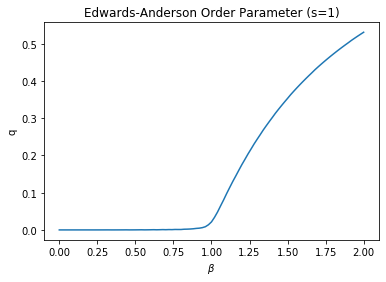

In [4]:
from scipy.integrate import quad

def integrand(x, c):
    return np.exp(-x**2/2)*np.cosh(c*x)**(-2)

n_approx = 100
beta_min = 0
beta_max = 2
beta_array = np.arange(n_approx + 1)*(beta_max - beta_min)/n_approx + beta_min
q_array = np.zeros(n_approx+1)

thresh = 0.001
n_max = 100

for i in range(n_approx+1):
    beta_tmp = beta_array[i]
    q_old = 0
    q_tmp = 1
    j = 0
    while np.abs(q_old - q_tmp) > thresh and j < n_max:
        q_old = q_tmp
        c = beta_tmp*s*np.sqrt(q_old)
        I = quad(integrand, -np.inf, np.inf, args=(c))
        q_tmp = 1 - I[0] / (np.sqrt(2*np.pi))
        j =+ 1
    q_array[i] = q_tmp

plt.plot(beta_array, q_array)
plt.xlabel(r"$\beta$")
plt.ylabel("q")
plt.title("Edwards-Anderson Order Parameter (s=1)")
plt.show()

This displays the behaviour we expect (approximately) for low beta below $1/s$ the temperature is above $s$ and so $q=0$ (non-magnetic) above this point the system is in the glassy phase. Since we have only approximated here there is some noise around the transition point. As we add more approximation points the transition should become sharper at $\beta = 1/s$.

## Conclusion
In this blog post we have introduced the assumptions of the Sherrington-Kirkpatrick (fully connected Ising) spin glass model. We have seen that although fairly involved we can "solve" this model analytically to uncover its properties. We have also a basic implementation in Python - however as we noted this has bad convergence properties so shouldn't really be used other than for illustration.

## References
This blog post was inspired by chapter 5 of "Spin Glasses and Complexity" by Daniel L Stein and Charles M Newman.

Some relevant papers include:
* The original paper: "Solvable Model of a Spin-Glass" - Sherrington, Kirkpatrick 1975
* Summary of Parisi Method: "The Sherrington-Kirkpatrick model: an overview" - Panchenko 2012

___
This is the first blog post in a series - you can find the next blog post [here](https://lewiscoleblog.com/spin-glass-models-3)